In [3]:
#IMPORT THE IMPORTANT LIBRARIES


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression



# IMPORTING THE DATA

In [4]:
data=pd.read_csv ('Data_MFR_310.csv')

# CHECKING THE HEAD OF THE DATASET

In [5]:
data.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


# PREPROCESSING

In [6]:
data.columns

Index(['Unnamed: 0', '513FC31103.pv', '513HC31114-5.mv', '513PC31201.pv',
       '513LC31202.pv', '513FC31409.pv', '513FC31114-5.pv', '513TC31220.pv',
       'MFR'],
      dtype='object')

In [7]:
data.rename(columns = {'513FC31103.pv':'Propylene flow' , '513HC31114-5.mv':'Hydrogen Ratio' , '513PC31201.pv':'Pressure controller' , '513LC31202.pv':'Level controller' , '513FC31409.pv':'LR gas to R-310 dome top', '513FC31114-5.pv':'Hydrogen Flow' , '513TC31220.pv':'Temperature controller'}, inplace=True)

In [8]:
data.columns

Index(['Unnamed: 0', 'Propylene flow', 'Hydrogen Ratio', 'Pressure controller',
       'Level controller', 'LR gas to R-310 dome top', 'Hydrogen Flow',
       'Temperature controller', 'MFR'],
      dtype='object')

In [9]:
data

,Unnamed: 0,Propylene flow,Hydrogen Ratio,Pressure controller,Level controller,LR gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-2018 09:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


In [10]:
data.drop('Unnamed: 0',axis = 1 , inplace=True)

In [11]:
data.tail()

,Propylene flow,Hydrogen Ratio,Pressure controller,Level controller,LR gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
2559,24437.988,0.185,31.025928,77.189499,24022.73,0.103966,81.783371,12.3
2560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7
2563,NaN,0.000,NaN,NaN,NaN,NaN,NaN,3.4


# THE MISSING DATA

In [12]:
data.isnull().tail()

,Propylene flow,Hydrogen Ratio,Pressure controller,Level controller,LR gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
2559,False,False,False,False,False,False,False,False
2560,True,True,True,True,True,True,True,False
2561,True,True,True,True,True,True,True,False
2562,True,True,True,True,True,True,True,False
2563,True,False,True,True,True,True,True,False


In [13]:
data.notnull().tail()

,Propylene flow,Hydrogen Ratio,Pressure controller,Level controller,LR gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
2559,True,True,True,True,True,True,True,True
2560,False,False,False,False,False,False,False,True
2561,False,False,False,False,False,False,False,True
2562,False,False,False,False,False,False,False,True
2563,False,True,False,False,False,False,False,True


In [14]:
data.isnull().sum()

Propylene flow              78
Hydrogen Ratio               4
Pressure controller         80
Level controller            80
LR gas to R-310 dome top    80
Hydrogen Flow               78
Temperature controller      80
MFR                          0
dtype: int64

In [15]:
pd.Series([True, False, True]).sum()

2

In [16]:
data.shape

(2564, 8)

In [17]:
data.dropna(how='all').shape

(2564, 8)

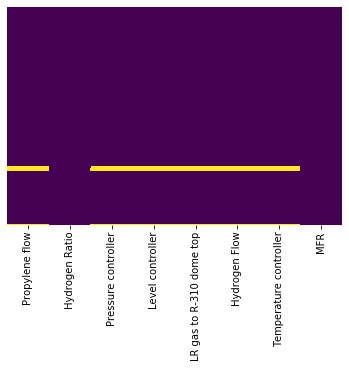

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# IMPORTING THE CLASS FOR THR MISSING VALUES

In [19]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan , strategy='Mean')

In [65]:
#filling the missing value with mean in Propylene flow
data.fillna(0)

,Propylene flow,Hydrogen Ratio,Pressure controller,Level controller,LR gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...
2559,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,3.5
2561,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,4.0
2562,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,3.7


In [74]:
data["Propylene flow"].fillna( method ='ffill', inplace = True) 
data["Hydrogen Ratio"].fillna( method ='ffill', inplace = True) 
data["Pressure controller"].fillna( method ='ffill',  inplace = True) 
data["Level controller"].fillna( method ='ffill', inplace = True) 
data["LR gas to R-310 dome top"].fillna( method ='ffill' , inplace = True) 
data["Hydrogen Flow"].fillna( method ='ffill', inplace = True) 
data["Temperature controller"].fillna( method ='ffill', inplace = True) 

In [44]:
X=data.iloc[:,:-1].values

In [45]:
y= data.iloc[:,-1].values

In [76]:
X

array([[2.48565840e+04, 1.53000000e-01, 3.04148350e+01, ...,
        5.08505780e+04, 1.63994446e-01, 8.03996050e+01],
       [2.55372500e+04, 1.53000000e-01, 3.05271210e+01, ...,
        4.22298130e+04, 1.29739460e-01, 7.88613280e+01],
       [2.56892660e+04, 1.53000000e-01, 3.03561800e+01, ...,
        4.53358520e+04, 1.50002820e-01, 7.88181150e+01],
       ...,
       [2.44379880e+04, 1.85000000e-01, 3.10259280e+01, ...,
        2.40227300e+04, 1.03966122e-01, 8.17833710e+01],
       [2.44379880e+04, 1.85000000e-01, 3.10259280e+01, ...,
        2.40227300e+04, 1.03966122e-01, 8.17833710e+01],
       [2.44379880e+04, 0.00000000e+00, 3.10259280e+01, ...,
        2.40227300e+04, 1.03966122e-01, 8.17833710e+01]])

In [77]:
y

array([3.4, 3.2, 3.2, ..., 4. , 3.7, 3.4])

# TRAIN TEST SPLIT

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state =42)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
x_test = scaler.fit_transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr=LinearRegression()

In [86]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred_lr = lr.predict(X_test)

# CREATING POLYNOMIAL LINEAR REGRESSION

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly_feat = PolynomialFeatures(degree =2)

In [92]:
X_train_Pol = poly_feat.fit_transform(X_train)

In [93]:
X_test_Pol = poly_feat.fit_transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr_poly = LinearRegression()

In [99]:
lr_poly.fit(X_train_Pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_pred_pol = lr_poly.predict(X_test_Pol)

# Creating the support vector regressor

In [101]:
from sklearn.svm import SVR

In [102]:
svr = SVR(kernel = 'rbf')

In [103]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
svr_pred = svr.predict(X_test)

# Creating the decision tree regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dtr = DecisionTreeRegressor()

In [108]:
dtr.fit (X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [109]:
y_pred_dtr = dtr.predict(X_test)

# evaluating the models

In [110]:
from sklearn .metrics import mean_absolute_error , mean_squared_error,r2_score

In [111]:
print('The mean absolute error of linear regression:',mean_absolute_error(y_pred_lr,y_test))

The mean absolute error of linear regression: 37192.57733347704


In [112]:
print('The mean squared error of linear regression:',mean_squared_error(y_pred_lr,y_test))

The mean squared error of linear regression: 1621027256.5250437


In [115]:
print('The mean absolute error of polynomial regression:',mean_absolute_error(y_pred_pol,y_test))

The mean absolute error of polynomial regression: 516650310.1822964


In [124]:
print('The mean squared error of linear regression:',mean_squared_error(y_pred_lr,y_test))
print('The R2 score is' , r2_score(svr_pred,y_test))

The mean squared error of linear regression: 1621027256.5250437
The R2 score is -2.5962701566362515e+30


In [126]:
print('The mean absolute error of decision tree:',mean_absolute_error(y_pred_dtr,y_test))
print('The mean squared error of decision tree:',mean_squared_error(y_pred_dtr,y_test))
print('The R2 score is' , r2_score(y_pred_dtr, y_test))


The mean absolute error of decision tree: 3.541648106904231
The mean squared error of decision tree: 24.537839643652564
The R2 score is -1.3017735574751814
